<a href="https://colab.research.google.com/github/Saurav1934/word_counter/blob/main/Word_Counter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

+----------+-----+
|      word|count|
+----------+-----+
|       big|    3|
|    branch|    1|
|        of|    1|
|       cse|    1|
|    faster|    3|
|      fast|    1|
|    google|    1|
|     colab|    1|
|    useful|    1|
|       for|    1|
|       and|    1|
|      aiml|    7|
|      data|    3|
|        is|    3|
|       the|    1|
|processing|    1|
+----------+-----+



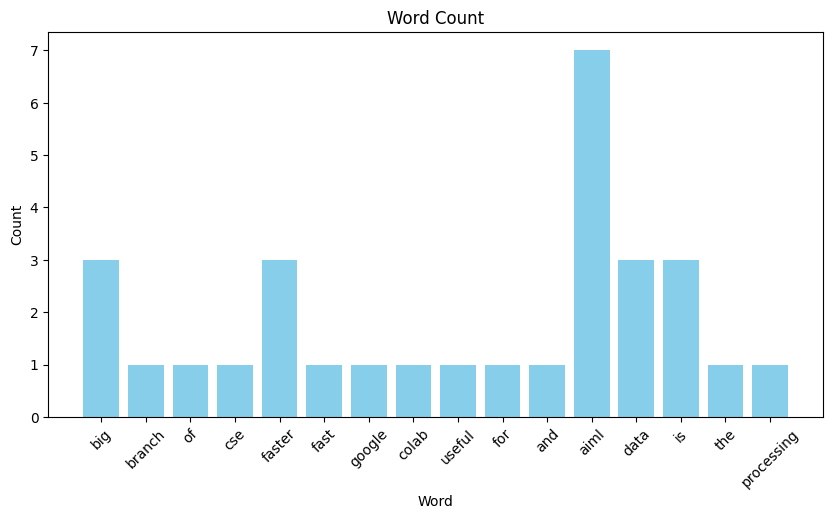

In [ ]:
# Install PySpark (if not installed)
!pip install pyspark

# Import necessary libraries
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

# Start Spark session
spark = SparkSession.builder.appName("WordCount").getOrCreate()

# Sample data
data = [
    "Big Data is the Branch of CSE.",
    "Big data is processing faster fast faster faster",
    "Google colab is useful for big Data and AIML AIML AIML AIML AIML AIML AIML"
]

# Create RDD
rdd = spark.sparkContext.parallelize(data)

# Word count transformation
word_count = (
    rdd.flatMap(lambda line: line.split(" "))  # Split into words
    .map(lambda word: (word.lower().strip(".,!?"), 1))  # Convert to lowercase & remove punctuation
    .reduceByKey(lambda a, b: a + b)  # Count occurrences
)

# Convert RDD to DataFrame
word_count_df = word_count.toDF(["word", "count"])

# Show the results
word_count_df.show()

# Convert to Pandas for visualization
word_count_pd = word_count_df.toPandas()

# Plot word count
plt.figure(figsize=(10, 5))
plt.bar(word_count_pd["word"], word_count_pd["count"], color="skyblue")
plt.xlabel("Word")
plt.ylabel("Count")
plt.title("Word Count")
plt.xticks(rotation=45)
plt.show()
